In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Data/USvideos.csv/USvideos.csv")
data.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [5]:
print("Shape of data : ", data.shape)

Shape of data :  (40949, 16)


In [8]:
data.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [10]:
data.fillna("",inplace=True)
data.isnull().sum().sum()

0

In [16]:
data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [17]:
commentdisabled = pd.get_dummies(data["comments_disabled"], prefix='comments_disabled')
ratingdisabled = pd.get_dummies(data["ratings_disabled"], prefix='ratings_disabled')
videoerror = pd.get_dummies(data["video_error_or_removed"], prefix='video_error_or_removed')

In [18]:
videoerror.head(2)

,video_error_or_removed_False,video_error_or_removed_True
0,1,0
1,1,0


In [19]:
datacon = pd.concat([commentdisabled, ratingdisabled, videoerror], axis=1)
datacon.head(2)

,comments_disabled_False,comments_disabled_True,ratings_disabled_False,ratings_disabled_True,video_error_or_removed_False,video_error_or_removed_True
0,1,0,1,0,1,0
1,1,0,1,0,1,0


In [21]:
data.drop(["comments_disabled","ratings_disabled","video_error_or_removed"], inplace=True, axis=1)
data.shape[1]

13

In [22]:
data = pd.concat([data, datacon], axis=1)
data.shape[1]

19

In [24]:
chantitle = data["channel_title"].unique()
len(chantitle)

2207

In [27]:
data.corr().loc['likes',:]

category_id                    -0.173921
views                           0.849177
likes                           1.000000
dislikes                        0.447186
comment_count                   0.803057
comments_disabled_False         0.028918
comments_disabled_True         -0.028918
ratings_disabled_False          0.020888
ratings_disabled_True          -0.020888
video_error_or_removed_False    0.002641
video_error_or_removed_True    -0.002641
Name: likes, dtype: float64

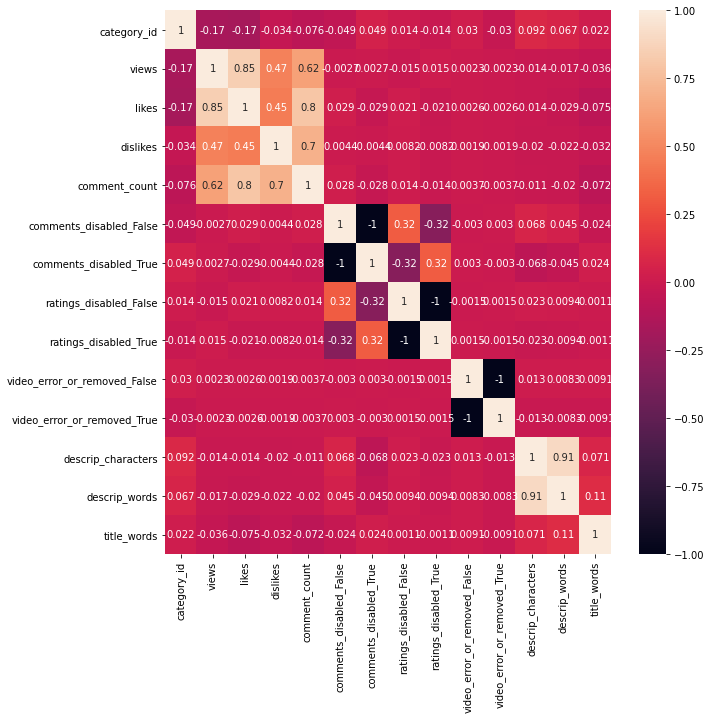

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [31]:
descrip_characters = data['description'].str.len()
descrip_characters.head(3) # Character Count of Description

0    1410
1     630
2    1177
Name: description, dtype: int64

In [30]:
descrip_words = data['description'].str.split().str.len()
descrip_words.head(3) # Word Count of Description

0    130
1     80
2     74
Name: description, dtype: int64

In [32]:
data["descrip_characters"] = descrip_characters
data["descrip_words"] = descrip_words
data.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,comments_disabled_False,comments_disabled_True,ratings_disabled_False,ratings_disabled_True,video_error_or_removed_False,video_error_or_removed_True,descrip_characters,descrip_words
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,0,1,0,1,0,1410,130
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",1,0,1,0,1,0,630,80


In [34]:
data["title_words"] = data['title'].str.split().str.len()
data.head(2)  # Word Count for Title

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,comments_disabled_False,comments_disabled_True,ratings_disabled_False,ratings_disabled_True,video_error_or_removed_False,video_error_or_removed_True,descrip_characters,descrip_words,title_words
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,0,1,0,1,0,1410,130,7
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",1,0,1,0,1,0,630,80,10


In [35]:
data.corr().loc['likes',:]

category_id                    -0.173921
views                           0.849177
likes                           1.000000
dislikes                        0.447186
comment_count                   0.803057
comments_disabled_False         0.028918
comments_disabled_True         -0.028918
ratings_disabled_False          0.020888
ratings_disabled_True          -0.020888
video_error_or_removed_False    0.002641
video_error_or_removed_True    -0.002641
descrip_characters             -0.013887
descrip_words                  -0.029141
title_words                    -0.074658
Name: likes, dtype: float64

In [41]:
data['datetime'] = pd.to_datetime(data['publish_time'])    
data['datetime_delta'] = data['datetime'] - data['datetime'].min()
data['datetime_delta'].head()

0   4131 days 08:48:50
1   4130 days 23:05:49
2   4130 days 10:41:13
3   4131 days 02:35:53
4   4130 days 09:37:30
Name: datetime_delta, dtype: timedelta64[ns]